This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

In [1]:
# select station
name_station_NOAA = 'CHIMOIO, MZ'

# Packages

In [24]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

import sys 
sys.path.append("../0-Functions")

from Functions_ImportData import import_filtered_NOAA_obs
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA
from Functions_ImportData import import_gorongosa_obs_pr
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6

from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month
from Functions_Indicators import select_station
from Functions_Indicators import filter_dataframe
from Functions_Indicators import model_to_kill

from Graphs_functions import cdf_plot_category_or_obs
from Graphs_functions import cdf_plot_category_or_obs_attempt
from Graphs_functions import boxplots_
from Graphs_functions import boxplots_without_outliers
from Graphs_functions import compare_3_lines
from Graphs_functions import boxplots_comp

# Import data

## Observations data

### Precipitation and temperature NOAA

In [4]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [5]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'NAME',name_station_NOAA)
# to select station in in Beira or Pemba, last input should be, respectively 'BEIRA, MZ' or 'PEMBA, MZ'

### how much missing data for climate variable

Between 1970, and 2014, in Chimoio

For 45 years (about 16436 days), missing 4961 days

Missing about 60% of TAVG data ((4961+4590)/16436*100)

Missing about 45% of TMAX data ((4961+2043)/16436*100)

Missing about 35% of TMIN data ((4961+1070)/16436*100)

Missing about 50% of PRCP data ((4961+3235)/16436*100)

Between 1970, and 2014, in Beira

Missing about 52% of TAVG data ((4961+3722)/16436*100)

Missing about 50% of TMAX data ((4961+3151)/16436*100)

Missing about 44% of TMIN data ((4961+2275)/16436*100)

Missing about 57% of PRCP data ((4961+4374)/16436*100)

### Precipitation from Gorongosa 

In [6]:
pr_obs_gorongosa_from_gorongosa=import_gorongosa_obs_pr()

In [7]:
pr_obs_gorongosa_from_gorongosa_to_comp = pr_obs_gorongosa_from_gorongosa[pr_obs_gorongosa_from_gorongosa['Year'].between(1980,2014)]

### how much missing data ?
No missing days between 1980 and 2014

Between 1980 and 2014, missing around 36% of the precipitation data in gorongosa

## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [8]:
# to compare historic modelisation with NOAA observation data
pr_model_NEX_GDDPCMIP6_to_comp_NOAA=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA('pr','mm_per_day')

In [9]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=filter_dataframe(pr_model_NEX_GDDPCMIP6_to_comp_NOAA,[name_station_NOAA],[],start_y=1970,stop_y=2014)

In [10]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past.sort_values(by='Model',inplace=True)

In [11]:
# import precipitation data in Gorongosa
df_pr_NEXGDDPCMIP6=import_treat_modeled_NEX_GDDP_CMIP6('pr','mm_per_day','day',1950,2100)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare = filter_dataframe(df_pr_NEXGDDPCMIP6,['Gorongosa_EIB'],[],start_y=1980,stop_y=2014)

### Temperature NEX-GDDP-CMIP6

In [12]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1950-2100.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']

In [13]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA('tas','Celsius')

In [14]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA[tas_model_NEX_GDDPCMIP6_to_comp_NOAA['Year'].between(2030,2065)]
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_future = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_future['Name station']=='CHIMOIO, MZ']

### Maximum temperature NEX-GDDP-CMIP6

In [15]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA,'Date')

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA['Year'].between(1973,2013)]

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']

### Minimum temperature NEX GDDP CMIP6

In [16]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmin_1970-2014_projectsMoz.csv'
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

In [17]:
# Chimoio

In [18]:
df_obs_Chimoio=daily_sum_obs_from_NOAA_CHIMOIO#[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1974,2014)]

missing data


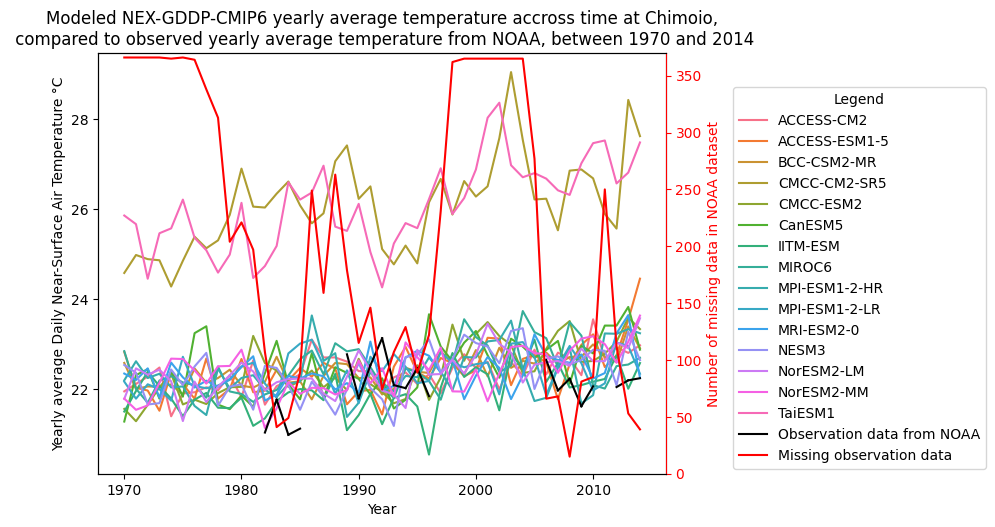

In [19]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',df_obs_Chimoio,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

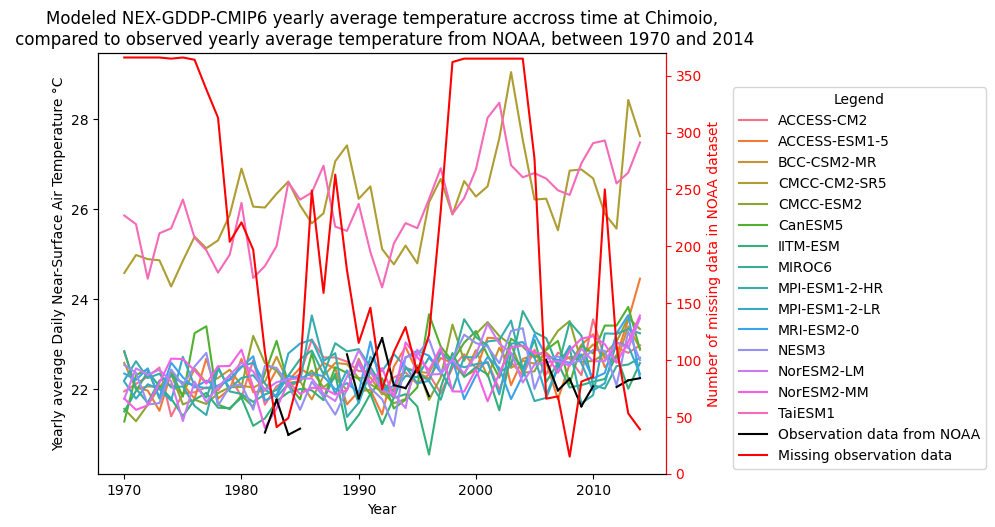

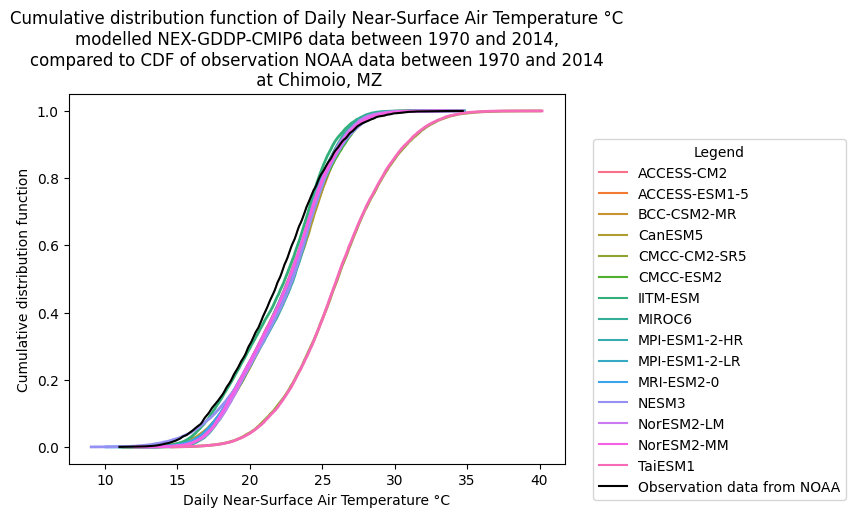

In [20]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=df_obs_Chimoio,name_column_obs='TAVG',source_obs='NOAA')

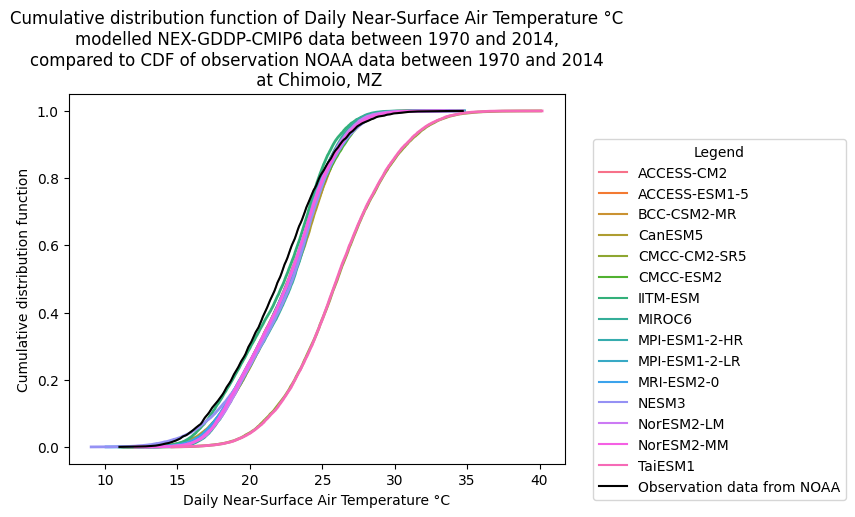

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\1-DownloadAndFormatData\../0-Functions\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


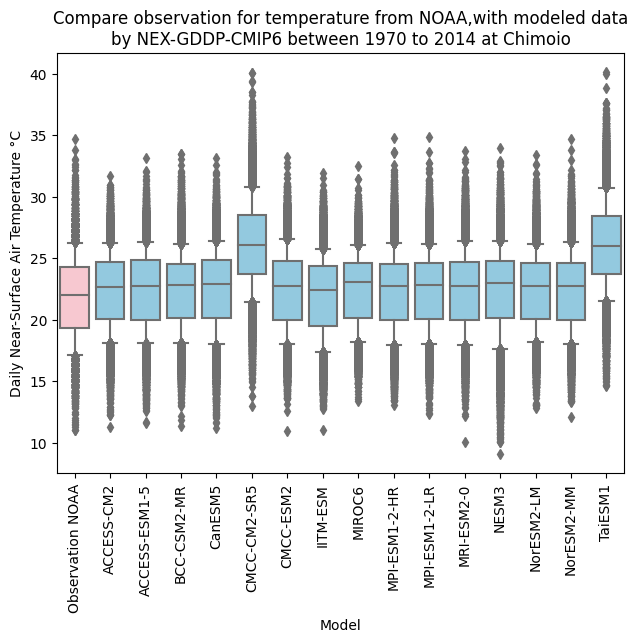

In [21]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',df_obs_Chimoio,'TAVG','Chimoio')

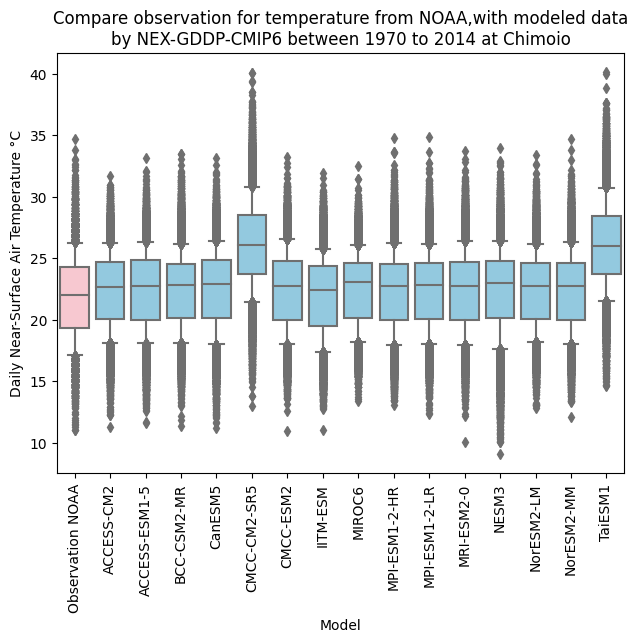

## Maximum temperature

In [22]:
# chimoio

missing data


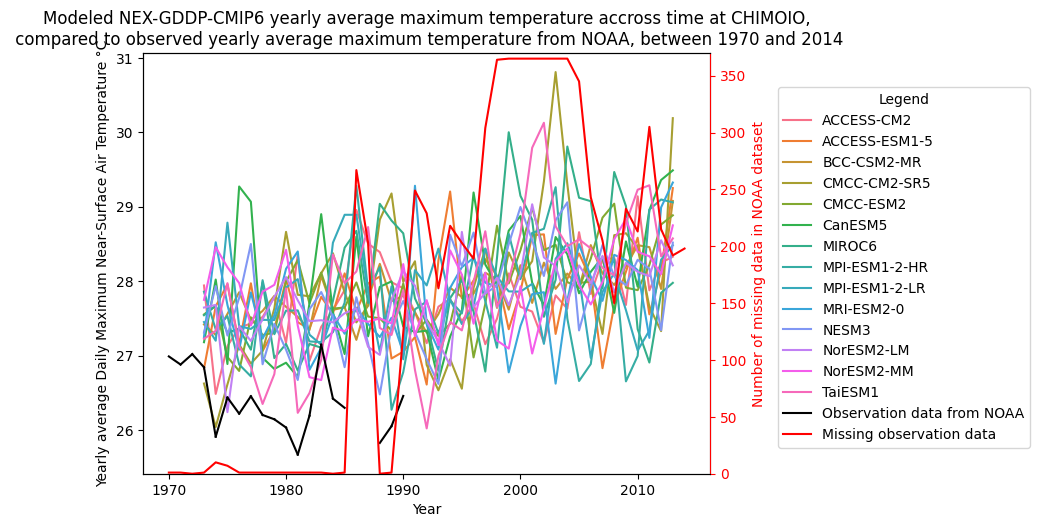

In [23]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

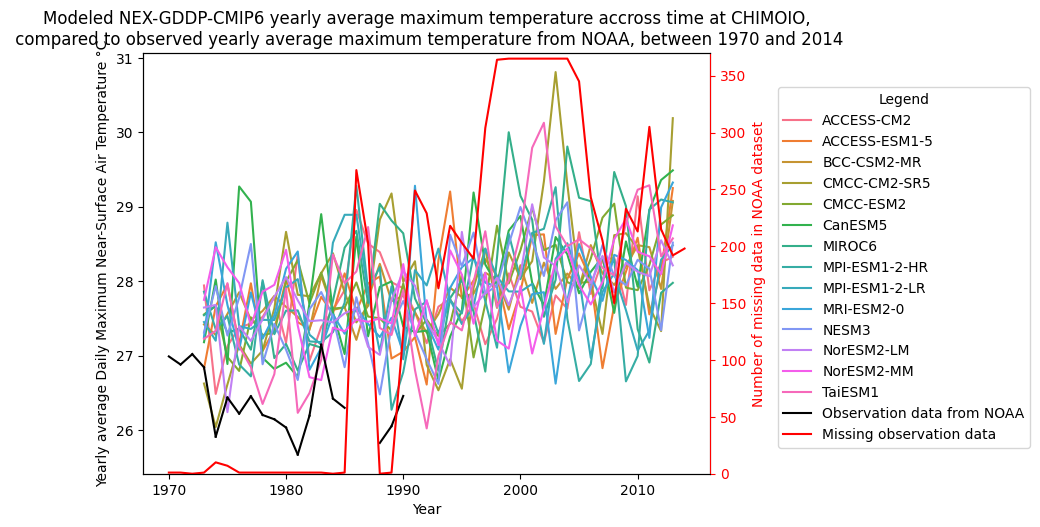

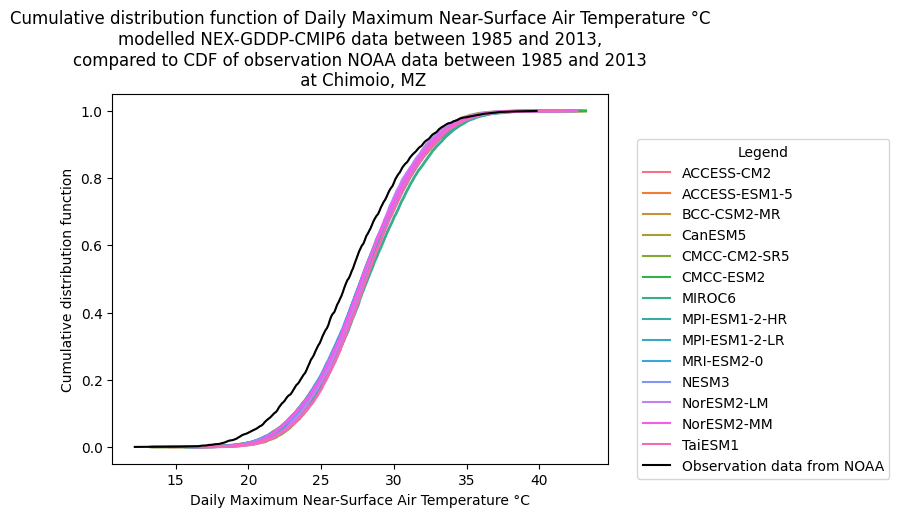

In [23]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2013)][['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2013)],name_column_obs='TMAX',source_obs='NOAA')

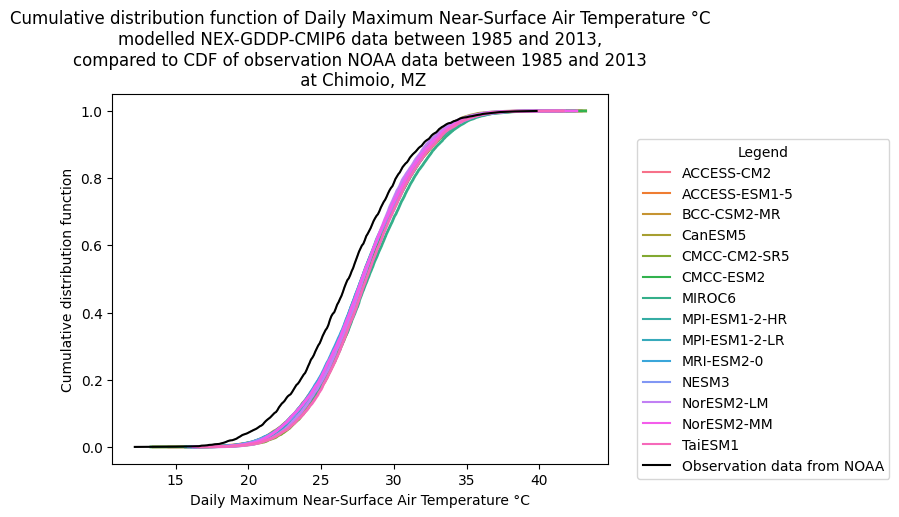

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


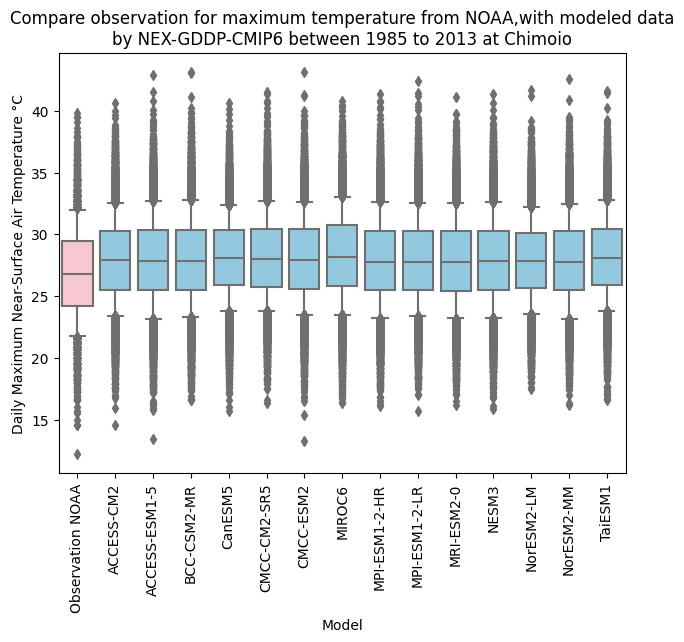

In [24]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past['Year'].between(1985,2013)],'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1985,2013)],'TMAX','Chimoio')

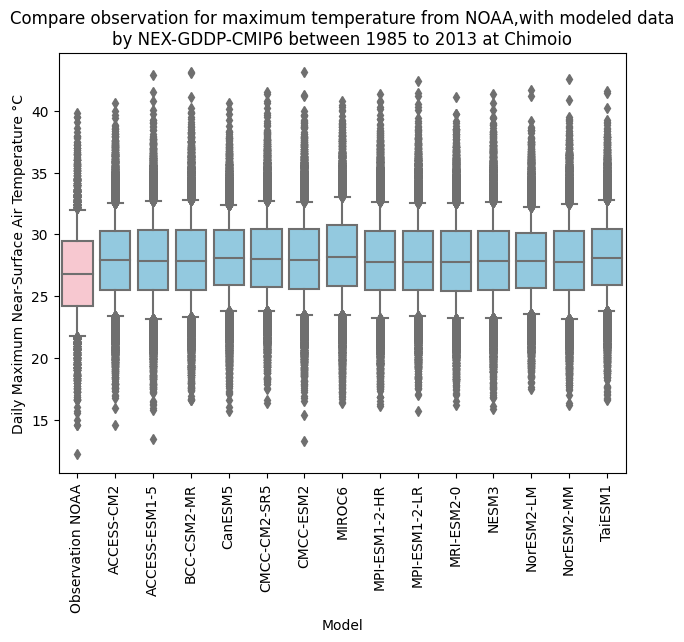

## Minimum temperature

In [25]:
# Chimoio

missing data


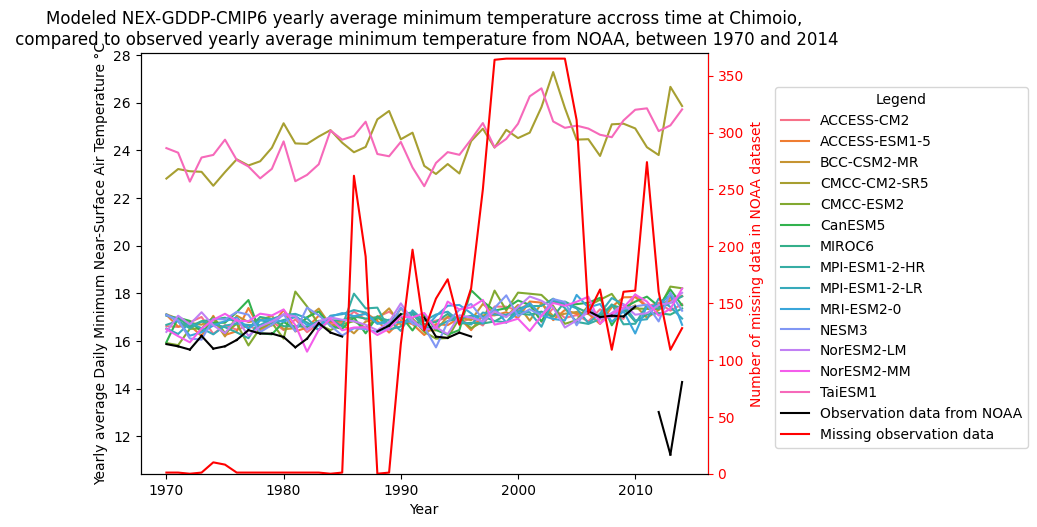

In [26]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

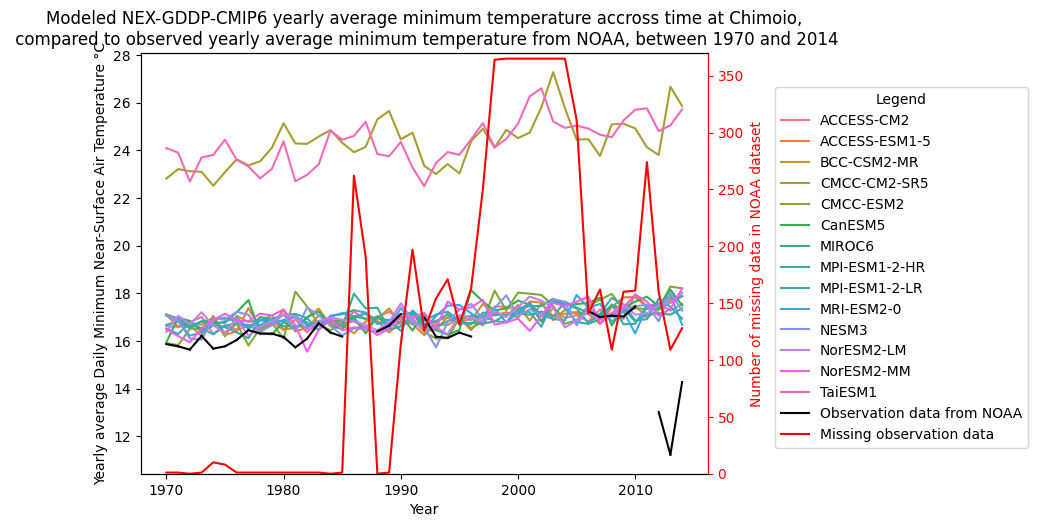

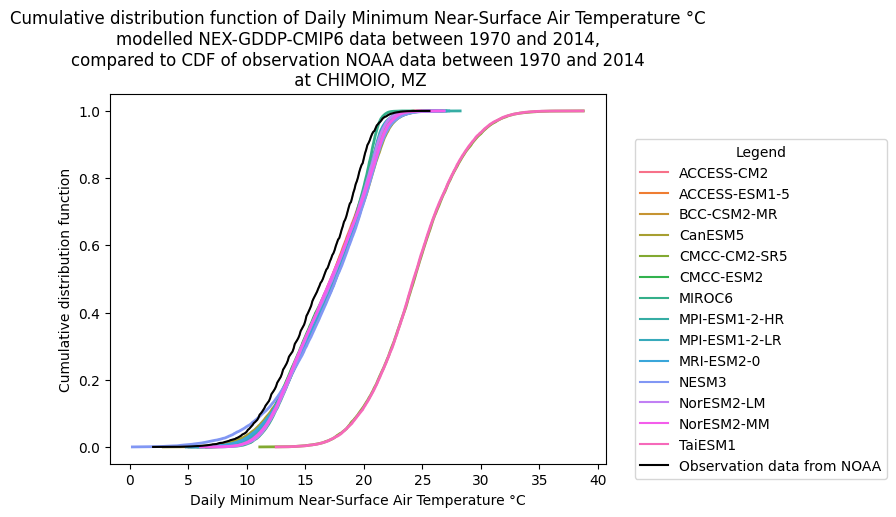

In [27]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

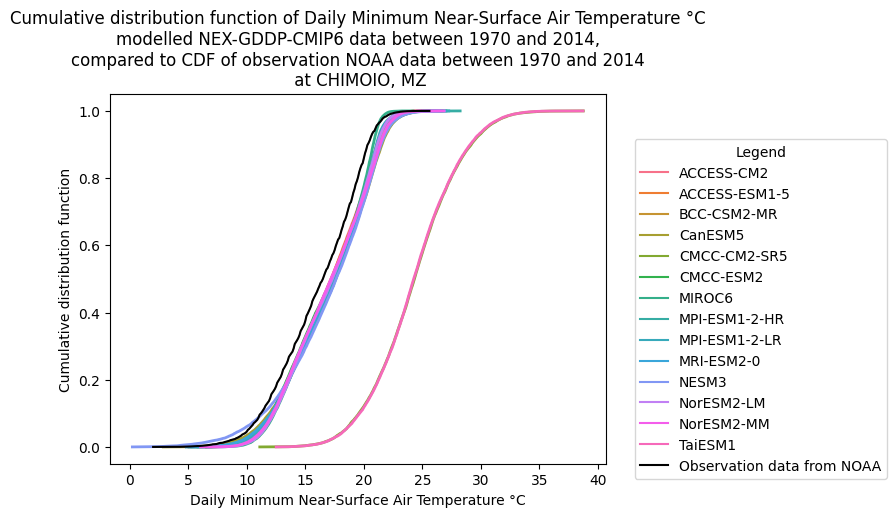

C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\Graphs_functions.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


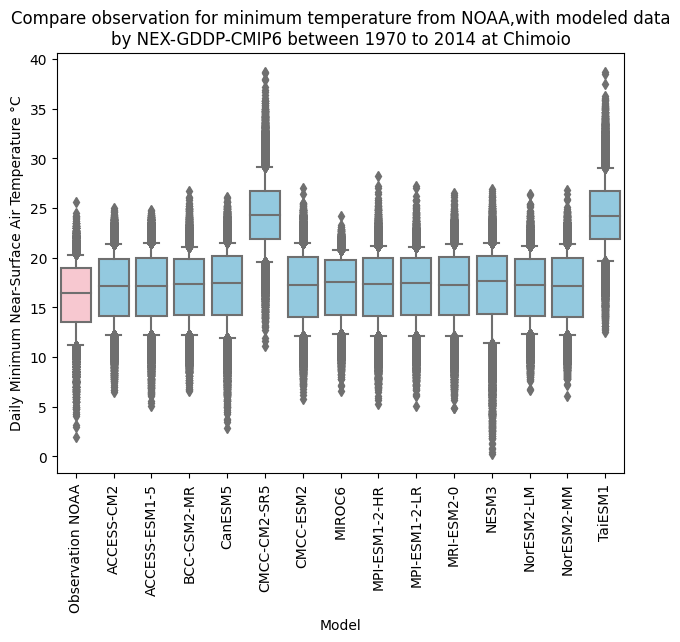

In [28]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

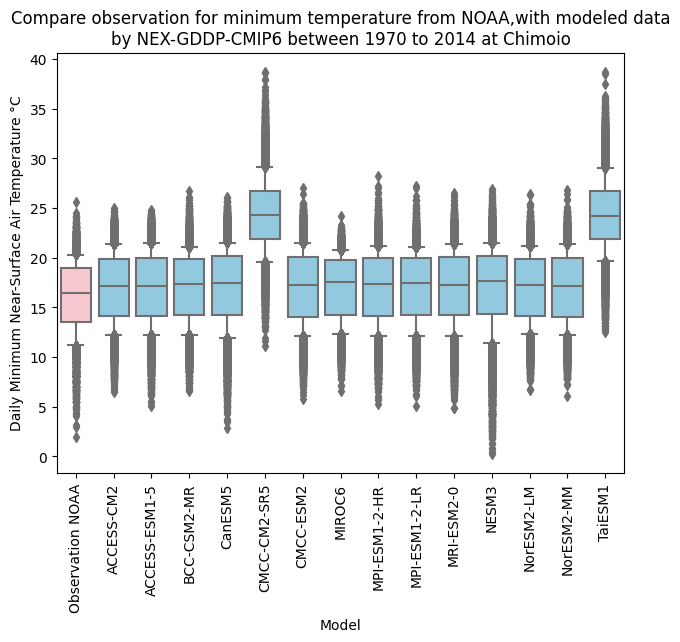

## Precipitation

In [29]:
# Chimoio past emplacement station

In [30]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past

,Name station,Experiment,Model,Latitude,Longitude,Date,Mean of the daily precipitation rate mm per day,Year,Month,Season
2248080,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,01-01-1970,21.408527,1970,Jan,Humid
2259029,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,24-12-1999,16.516245,1999,Dec,Humid
2259030,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,25-12-1999,13.651735,1999,Dec,Humid
2259031,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,26-12-1999,13.472292,1999,Dec,Humid
2259032,"CHIMOIO, MZ",historical,ACCESS-CM2,-19.125,33.375,27-12-1999,11.439922,1999,Dec,Humid
...,...,...,...,...,...,...,...,...,...,...
2585937,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,05-01-1985,14.639786,1985,Jan,Humid
2585938,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,06-01-1985,3.179719,1985,Jan,Humid
2585939,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,07-01-1985,3.451764,1985,Jan,Humid
2585845,"CHIMOIO, MZ",historical,TaiESM1,-19.125,33.375,05-10-1984,0.000000,1984,Oct,Humid


compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Mean of the daily precipitation rate mm per day','NEX-GDDP-CMIP6',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm per day','Chimoio')
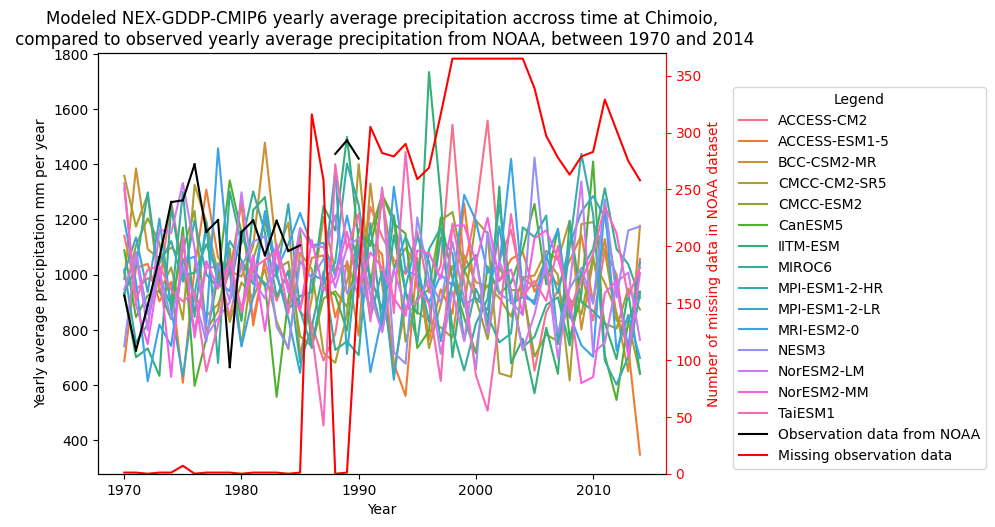

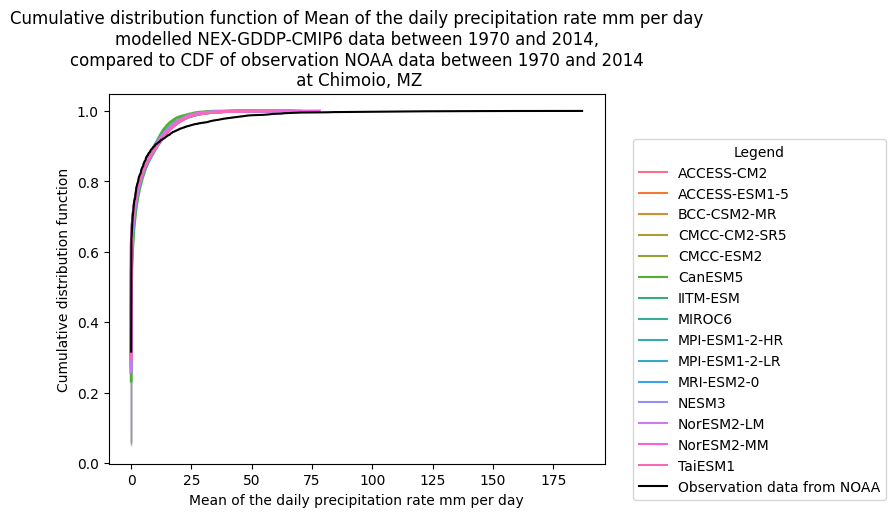

In [38]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)][['Model','Year','Mean of the daily precipitation rate mm per day']],name_column_df='Mean of the daily precipitation rate mm per day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1970,2014)],name_column_obs='PRCP',source_obs='NOAA')

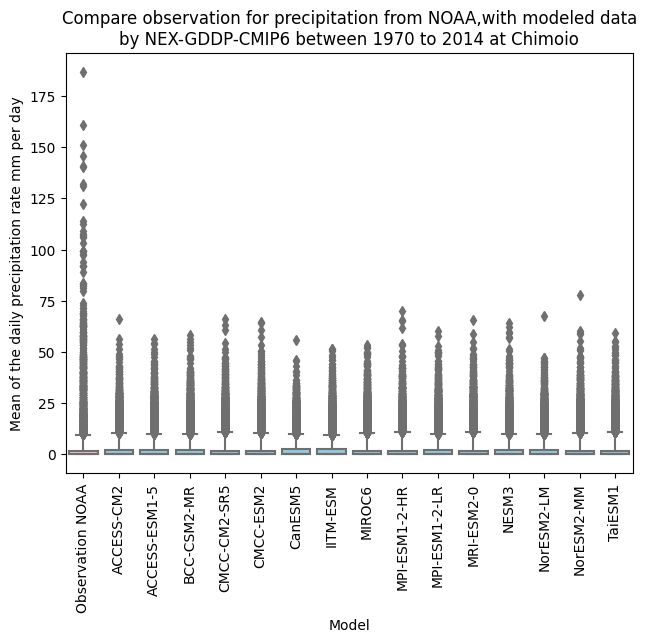

In [37]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)],'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1970,2014)],'PRCP','Chimoio')

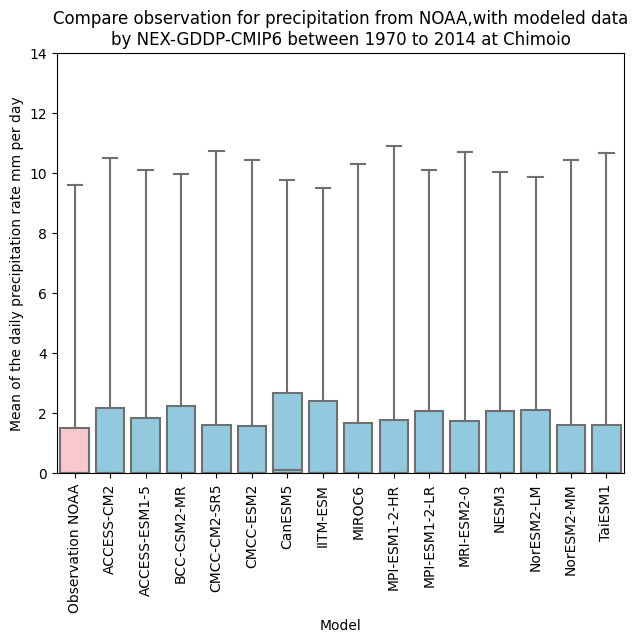

In [36]:
boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Year'].between(1970,2014)],'Mean of the daily precipitation rate mm per day',daily_sum_obs_from_NOAA_CHIMOIO[daily_sum_obs_from_NOAA_CHIMOIO['Year'].between(1970,2014)],'PRCP','Chimoio')

# Precipitation at gorongosa (close to chimoio)
Comparison with data given by Andre

compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day','NEX-GDDP-CMIP6',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','\nmeteorological station\ngorongosa','Yearly mean of the mean daily precipitation rate mm/day','Gorongosa')
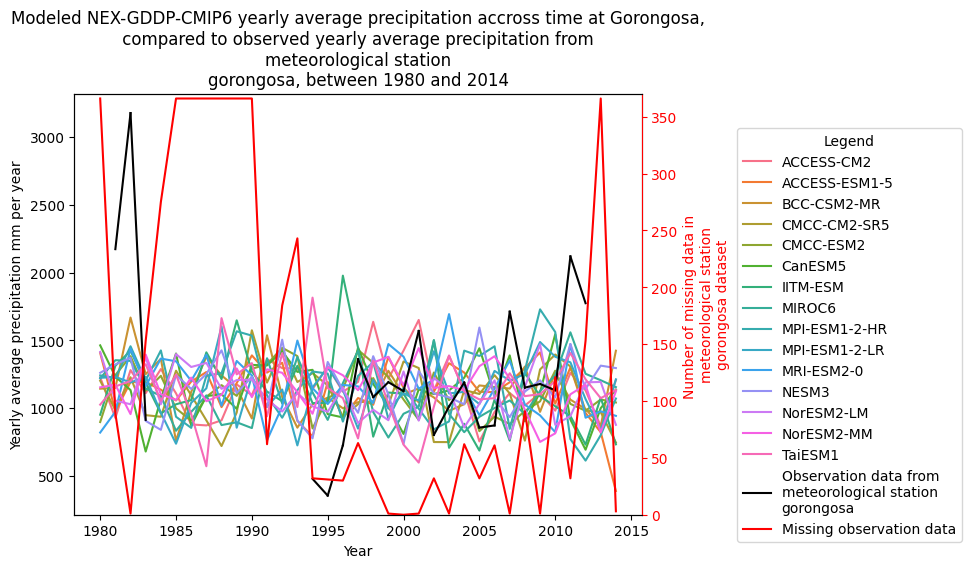

cdf_plot_category_or_obs('Gorongosa, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare[['Model','Year','Mean of the daily precipitation rate mm_per_day']],name_column_df='Mean of the daily precipitation rate mm_per_day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=pr_obs_gorongosa_from_gorongosa_to_comp,name_column_obs='pr',source_obs='\nmeteorological station\ngorongosa')
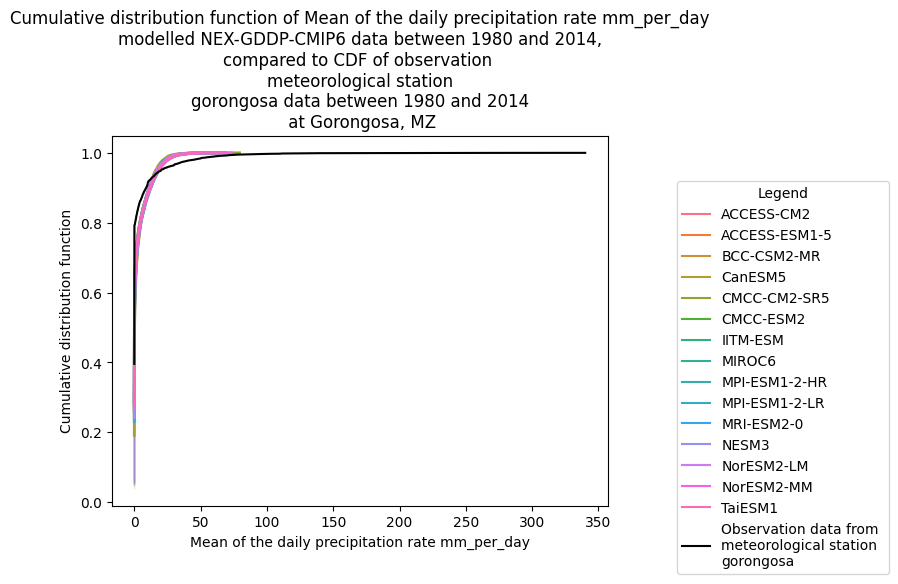

boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')
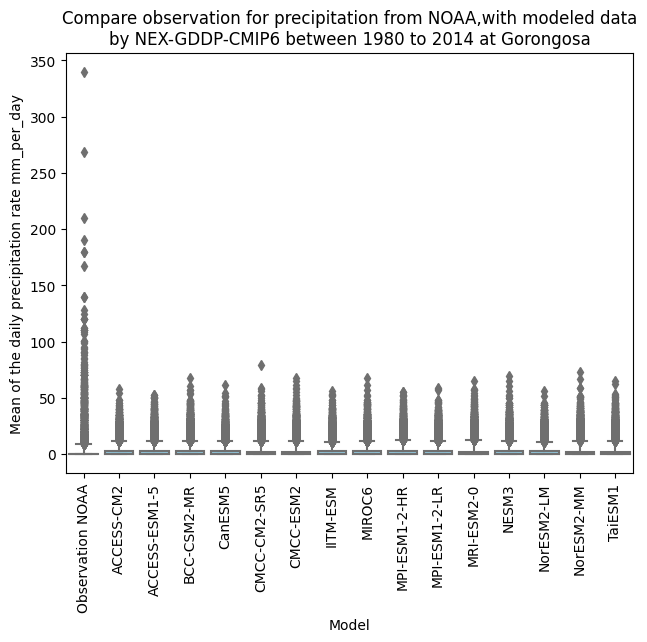

boxplots_without_outliers('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Gorongosa_to_compare,'Mean of the daily precipitation rate mm_per_day',pr_obs_gorongosa_from_gorongosa_to_comp,'pr','Gorongosa')
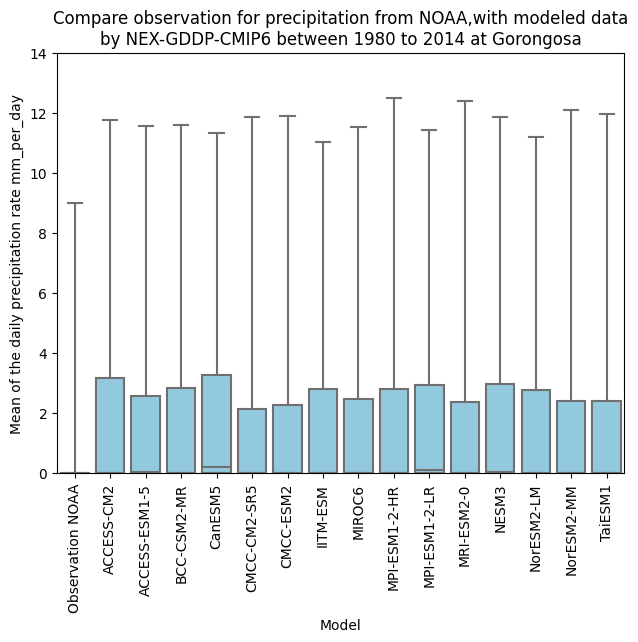

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable